[<img src="https://i.ibb.co/tz8Nv9m/1622903831109.jpg" alt="1622903831109" border="0" width=100%>](https://www.theforage.com/virtual-internships/theme/m7W4GMqeT3bh9Nb2c/KPMG-Data-Analytics-Virtual-Internship?ref=SNEAssbMonFHCKpNe)

# THINGS THAT NEED TO BE DONE

- Organizar os graficos (em termos de ordem e titulo)
- Fazer sintese dos resultados dos graficos
- Frequency? Numero de compras? Rever isso. Renomeei a coluna, mas tem que rever
- O mergedDf devia ter o recency/frequency to transactions. Dar um merge correto. Rever isso!
- Usar somente a tecnica de RFM e nao o k means em seguida.
- Montar o ppt o quanto antes

### [ Noa Prada Schnor](https://www.linkedin.com/in/npradaschnor/)

***

## Task 1. Data Quality Assessment
### Assessment of data quality and completeness in preparation for analysis.

Review the <b> data quality</b> to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

The <b> task </b> itself is to draft an <b>email to the client</b> identifying the <b> data quality issues</b>  and strategies to mitigate these issues. Refer to <i>‘Data Quality Framework Table’</i> for criteria and dimensions which you should consider.

Below is a list of the Data Quality dimensions our team may use to evaluate a dataset. 


<img src="https://i.ibb.co/W3bMT4p/standard-data-quality-dimensions.png" alt="standard-data-quality-dimensions" border="0" width=40%>

### Background information
Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 

Smith discusses KPMG’s expertise in this space. In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that <i>“the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”</i>

The client provided KPMG with 3 datasets:

- Customer Demographic 
- Customer Addresses
- Transactions data in the past 3 months

You decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

## Task 2. Data Insights
###  Targeting high value customers based on customer demographics and attributes.

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting.


### Background information
Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

## Task 3. Data Insights and Presentation
### Using visualisations to present insights

***

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import datetime
from datetime import datetime as dt, date
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


%matplotlib inline

In [2]:
#Load spreadsheet
file = 'KPMG_VI_New_raw_data_update_final.xlsx'

df= pd.ExcelFile((file))

#Get the sheet names
df.sheet_names

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

#### There are 4 different spreadsheets.

In [3]:
# Load each sheet into a DataFrame by its original name

Transactions = df.parse('Transactions')
NewCustomerList = df.parse('NewCustomerList')
CustomerDemographic = df.parse('CustomerDemographic')
CustomerAddress = df.parse('CustomerAddress')

### Transactions spreadsheet

In [4]:
#Check the the first rows of Transactions sheet/dataframe

Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


#### The column named 'product_first_sold_date' does not show a date, but a large number. I wonder if it is the total number of product sold since the company started to sell it.

In [5]:
#Number of records and number of columns
Transactions.shape

(20000, 13)

In [6]:
#Check if there is duplicated transaction
Transactions.duplicated(subset=['transaction_id']).sum()

0

#### The only column that shouldn't have a duplicated value is transaction_id. And no duplicated transaction was found.

In [7]:
#Check if the Transactions sheet/dataframe has missing values
Transactions.isnull().values.any()

True

#### The Transactions sheet/dataframe has missing values.

In [8]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### Nearly 2% (n=360) of all transactions (N=20000) has no information if the order was made online.
#### Basically 1% (n=197) of all transaction  (N=20000) has no information about the product (brand, line, class, and size), standard cost, and date that the product was first sold. 

In [9]:
nullTransactions = Transactions[Transactions.isnull().any(axis=1)]

nullTransactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0


In [10]:
nullTransactions = nullTransactions.sort_values('transaction_date', ascending=True)
nullTransactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 14761 to 15189
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           555 non-null    int64         
 1   product_id               555 non-null    int64         
 2   customer_id              555 non-null    int64         
 3   transaction_date         555 non-null    datetime64[ns]
 4   online_order             195 non-null    float64       
 5   order_status             555 non-null    object        
 6   brand                    358 non-null    object        
 7   product_line             358 non-null    object        
 8   product_class            358 non-null    object        
 9   product_size             358 non-null    object        
 10  list_price               555 non-null    float64       
 11  standard_cost            358 non-null    float64       
 12  product_first_sold_date  358 n

#### 555 transactions have at least one missing information, especially regarding if the order was made online. It looks like the transactions that have no information of product's brand, also have other info about product missing, like line, class, size, standard cost and date that it was first sold.
#### I believe that the company should be worried about missing informations related to product in the Transactions sheet. Those informations are quite important to understand the customer preferences, the revenue, and the product's stock control. Those informations should be tracked (maybe checking the invoices) and transferred into the Transactions sheet. 
#### Besides that, I recommend to think in ways to avoid this kind of situation (missing important information). For example, is the data entered manually into this sheet? If so, we could automate this process. 

In [11]:
#Check unique values of some columns

#Order status unique values
Transactions.order_status.unique()

array(['Approved', 'Cancelled'], dtype=object)

In [12]:
#brand unique values
Transactions.brand.unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

#### There is missing values for product brand (nan)

In [13]:
#product line unique values
Transactions.product_line.unique()

array(['Standard', 'Road', 'Mountain', 'Touring', nan], dtype=object)

#### There is missing values for product line(nan)

In [14]:
#Product class unique values
Transactions.product_class.unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [15]:
#Product size unique values
Transactions.product_size.unique()

array(['medium', 'large', 'small', nan], dtype=object)

#### There are missing values for product class and size (nan)
#### Looks like there is no duplicated or redundant values.

In [16]:
#Check list price and standard cost by creating a column subtracting cost from price
Transactions['diff_price_cost'] = Transactions.apply(lambda row: (row.list_price) - (row.standard_cost), axis = 1)

In [17]:
#Check first rows
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,diff_price_cost
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [18]:
#Rank info about product price and cost
Transactions_rank = Transactions.groupby(["customer_id"]).rank()

Transactions_rank.head()

,transaction_id,product_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date,diff_price_cost
0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0
1,1.0,1.0,3.0,6.0,7.0,4.0,6.0,7.0
2,1.0,3.0,5.0,2.0,5.0,3.0,1.0,5.0
3,1.0,6.0,7.0,3.0,5.0,4.0,4.0,6.0
4,1.0,9.0,9.0,6.5,8.0,8.0,10.0,7.0


In [19]:
#Number of transactions per rank of difference between product price and its cost
Transactions_rank.diff_price_cost.value_counts()

1.0     3380
2.0     3230
3.0     3060
4.0     2688
5.0     2218
6.0     1629
7.0     1088
8.0      638
9.0      369
1.5      222
2.5      200
10.0     186
3.5      166
4.5      160
5.5      132
6.5      108
11.0      96
7.5       78
8.5       54
12.0      40
9.5       30
13.0      13
11.5       6
12.5       4
10.5       4
13.5       2
14.0       2
Name: diff_price_cost, dtype: int64

#### Major part of customers are at the lowest rank for difference between the sell price and the cost price. 

In [20]:
#Number of transactions per rank of product price
Transactions_rank.list_price.value_counts()

1.0     3390
2.0     3248
3.0     3043
4.0     2720
5.0     2238
6.0     1644
7.0     1127
8.0      675
9.0      389
1.5      202
2.5      200
10.0     198
3.5      194
5.5      158
4.5      132
6.5      118
11.0     100
7.5       66
8.5       48
12.0      43
9.5       30
13.0      17
10.5       8
11.5       6
12.5       2
14.0       2
13.5       2
Name: list_price, dtype: int64

In [21]:
#Number of transactions per rank of standard cost
Transactions_rank.standard_cost.value_counts()

1.0     3384
2.0     3224
3.0     3039
4.0     2679
5.0     2206
6.0     1634
7.0     1088
8.0      657
9.0      380
2.5      218
1.5      212
10.0     193
3.5      192
4.5      178
6.5      116
5.5      114
11.0      98
7.5       64
8.5       42
12.0      40
9.5       14
13.0      13
10.5       6
12.5       4
11.5       4
14.0       2
13.5       2
Name: standard_cost, dtype: int64

#### Looks like most of customers purchase products not that expensive, Even the standard cost of those bought products is not high, the final profit is not that high.

In [22]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'diff_price_cost'],
      dtype='object')

In [23]:
#Get only price, cost and the difference between them of approved transactions
Trans = Transactions.filter(['transaction_date','order_status','list_price','standard_cost','diff_price_cost'], axis=1)
Trans_approved = Trans.loc[~(Trans.order_status == 'Cancelled')]

Trans_month = Trans_approved.transaction_date.dt.to_period("M")
Transactions_month = Trans_approved.groupby(Trans_month)

Transactions_month.head()

,transaction_date,order_status,list_price,standard_cost,diff_price_cost
0,2017-02-25,Approved,71.49,53.62,17.87
1,2017-05-21,Approved,2091.47,388.92,1702.55
2,2017-10-16,Approved,1793.43,248.82,1544.61
3,2017-08-31,Approved,1198.46,381.10,817.36
4,2017-10-01,Approved,1765.30,709.48,1055.82
5,2017-03-08,Approved,1538.99,829.65,709.34
6,2017-04-21,Approved,60.34,45.26,15.08
7,2017-07-15,Approved,1292.84,13.44,1279.40
8,2017-08-10,Approved,1071.23,380.74,690.49
9,2017-08-30,Approved,1231.15,161.60,1069.55


In [24]:
# Check number of transactions per month
pd.Series([len(Transactions_month.groups[i]) for i in Transactions_month.grouper.result_index], Transactions_month.grouper.result_index)

transaction_date
2017-01    1668
2017-02    1618
2017-03    1644
2017-04    1638
2017-05    1667
2017-06    1562
2017-07    1703
2017-08    1733
2017-09    1558
2017-10    1756
2017-11    1649
2017-12    1625
Freq: M, dtype: int64

#### Seems that the number of transactions per month has been consistent throughout the year.

In [25]:
#Ceck median values of product list, its standard cost, and the difference between them per month
Transactions_month.median()

,list_price,standard_cost,diff_price_cost
transaction_date,,,
2017-01,1163.89,507.58,445.210
2017-02,1163.89,513.85,437.460
2017-03,1151.96,507.58,437.460
2017-04,1151.96,507.58,445.210
2017-05,1172.78,525.33,445.210
2017-06,1151.96,507.58,445.210
2017-07,1163.89,507.58,437.460
2017-08,1172.78,459.71,448.680
2017-09,1151.96,464.72,445.210


#### Median of difference between the list price and the standard cost doesn't change significantly when checking every month of the year.

2017-01         AxesSubplot(0.1,0.736957;0.235294x0.163043)
2017-02    AxesSubplot(0.382353,0.736957;0.235294x0.163043)
2017-03    AxesSubplot(0.664706,0.736957;0.235294x0.163043)
2017-04         AxesSubplot(0.1,0.541304;0.235294x0.163043)
2017-05    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
2017-06    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
2017-07         AxesSubplot(0.1,0.345652;0.235294x0.163043)
2017-08    AxesSubplot(0.382353,0.345652;0.235294x0.163043)
2017-09    AxesSubplot(0.664706,0.345652;0.235294x0.163043)
2017-10             AxesSubplot(0.1,0.15;0.235294x0.163043)
2017-11        AxesSubplot(0.382353,0.15;0.235294x0.163043)
2017-12        AxesSubplot(0.664706,0.15;0.235294x0.163043)
Freq: M, dtype: object

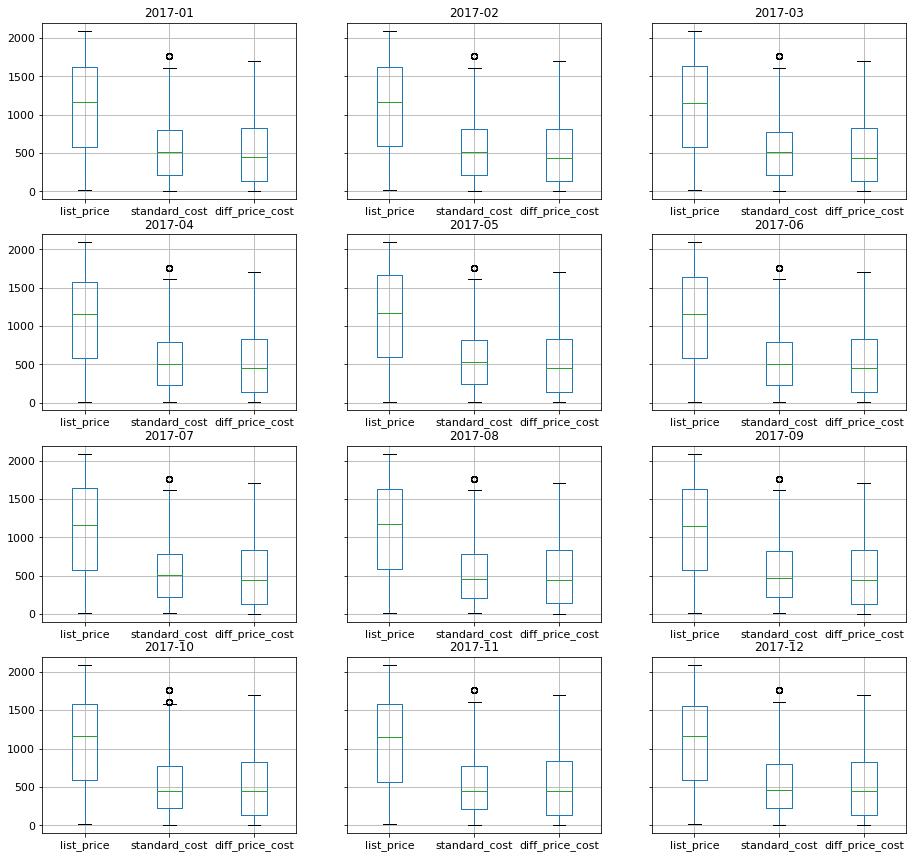

In [26]:
Transactions_month.boxplot(fontsize=11, figsize=(15,15))

#### List price has a wide range of product price
#### Standard cost has outliers and is right skewed
#### As a result the difference between the price and the cost also is right skewed

In [27]:
#Check basic info of Trans_month
Trans_month.describe()

count       19821
unique         12
top       2017-10
freq         1756
Name: transaction_date, dtype: object

#### It confirms that the table has data from the whole year of 2017, and that the month that had the highest number of transactions (n=1756) is October.

In [28]:
#Keep only transactions that were approved
Transactions = Transactions.loc[~(Trans.order_status == 'Cancelled')]

In [29]:
recent_purchase = Transactions['transaction_date'].max()
Transactions['recency'] = recent_purchase - Transactions['transaction_date']
Transactions['recency'] /= np.timedelta64(1, 'D')

In [30]:
#Give a score for recency. 1 being the lowest and 4 the highest.
Transactions['recency_category'] = pd.qcut(Transactions['recency'],q=4,labels=[4,3,2,1])

In [31]:
#Convert product first sold date to date
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date']).dt.date

In [32]:
#Check last rows
Transactions.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,diff_price_cost,recency,recency_category
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01,802.26,189.0,3
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01,104.24,51.0,5
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01,1592.19,260.0,2
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01,91.15,180.0,3
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,1970-01-01,195.34,99.0,4


In [33]:
#Check unique values of product first sold date 
Transactions['product_first_sold_date'].value_counts()

1970-01-01    19625
Name: product_first_sold_date, dtype: int64

#### The date that the product was first sold might not be correct, as it looks to be all the same (1st Jan 1970). If it is correct, probably the Company sells the same products since they were founded. 

In [34]:
#Drop product_first_sold_date column as it contains inconsistent data
Transactions.drop(['product_first_sold_date'], axis = 1,inplace=True)

In [35]:
# Check transactions with missing product brand value
Transactions_brand = Transactions[Transactions['brand'].isna()]
Transactions_brand

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,diff_price_cost,recency,recency_category
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN,98.0,4
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN,125.0,4
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN,295.0,1
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN,199.0,3
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN,181.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN,4.0,5
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN,202.0,3
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN,351.0,1
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN,189.0,3


In [36]:
#Check unique product price per product_id to see if I could find the values that could be used to filled the missing values for product's details
Transactions_price = Transactions[Transactions.duplicated('list_price', keep=False)].groupby('list_price',dropna=False)['product_id'].apply(list).reset_index()
Transactions_price

,list_price,product_id
0,12.01,"[0, 0, 19, 19, 19, 19, 19, 19, 0, 0, 19, 0, 19..."
1,60.34,"[22, 22, 22, 22, 22, 22, 0, 22, 22, 22, 22, 22..."
2,71.16,"[61, 0, 61, 61, 0, 61, 61, 0, 61, 0, 61, 61, 0..."
3,71.49,"[2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, ..."
4,100.35,"[91, 91, 91, 91, 91, 0, 91, 91, 91, 91, 91, 91..."
...,...,...
96,1977.36,"[60, 60, 64, 60, 60, 60, 64, 60, 64, 60, 60, 6..."
97,1992.93,"[26, 63, 26, 26, 26, 26, 26, 63, 26, 26, 63, 2..."
98,2005.66,"[51, 25, 25, 51, 25, 51, 51, 51, 51, 51, 51, 2..."
99,2083.94,"[79, 83, 83, 83, 79, 83, 83, 79, 83, 83, 83, 8..."


In [37]:
#Check product_id number 0 to find its information (brand, size, etc)
Transactions.loc[Transactions['product_id']==0]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,diff_price_cost,recency,recency_category
34,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,167.21,132.0,4
39,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,167.21,32.0,5
54,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,72.60,103.0,4
60,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,4.80,309.0,1
63,64,0,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,110.81,175.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19921,19922,0,1869,2017-01-06,1.0,Approved,Norco Bicycles,Road,medium,medium,543.39,407.54,135.85,358.0,1
19941,19942,0,966,2017-07-30,1.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,14.23,153.0,3
19967,19968,0,2751,2017-04-06,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,15.08,268.0,2
19987,19988,0,13,2017-04-05,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,167.21,269.0,2


#### product_id doesn't look like a reliable data, as products with the same product_id has different brand, line.class,size, and price.

In [38]:
#Drop column product_id
Transactions.drop(['product_id'],axis=1,inplace=True)

In [39]:
#Check numerical values
Transactions.describe()

,transaction_id,customer_id,online_order,list_price,standard_cost,diff_price_cost,recency
count,19821.000000,19821.000000,19467.000000,19821.000000,19625.000000,19625.000000,19821.000000
mean,10006.222794,1738.485899,0.499923,1107.623061,555.821210,551.923772,181.509308
std,5774.215708,1011.981306,0.500013,583.021720,405.977243,493.502909,105.384174
min,1.000000,1.000000,0.000000,12.010000,7.210000,4.800000,0.000000
25%,5003.000000,858.000000,0.000000,575.270000,215.140000,133.780000,89.000000
50%,10008.000000,1735.000000,0.000000,1163.890000,507.580000,445.210000,180.000000
75%,15010.000000,2613.000000,1.000000,1635.300000,795.100000,830.240000,273.000000
max,20000.000000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000,363.000000


#### The std of 'diff_price_cost' is kind of high, but is was expected as the std values of 'list_price' and 'standard_cost' are high. The  diff between list price and standard cost goes from 4.8 to 1702.55.

#### Note: looking at the Excel file I noticed that the 'list_price' column has no currency sign. but the standard_cost contains a dollar sign before the amount. The amounts in the sheet should be consistent, so all the monetary data should be free of currency sign (and a metadata file should be created indicating detailed information, such as currency) or should show the currency. I recommend the first suggestion: metadata. Have a better look about metadata: https://www.thoughtco.com/metadata-definition-and-examples-1019177

In [40]:
#Separate year from transaction date
Transactions['year'] = Transactions['transaction_date'].dt.year

# Check the unique ordered year values 
codes, uniques = Transactions.year.factorize(sort=True)
uniques

Int64Index([2017], dtype='int64')

In [41]:
#Separate month from transaction date
Transactions['month'] = Transactions['transaction_date'].dt.month

# Check the unique ordered year values 
codes, uniques = Transactions.month.factorize(sort=True)
uniques

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

#### The Transactions sheet contains the transactions completed from Jan17 to Dec17.

In [42]:
#Drop columns year and month
Transactions.drop(Transactions[['year']], axis = 1,inplace=True)

In [43]:
Transactions['profit_category'] = pd.qcut(Transactions.diff_price_cost,q=3,
                        labels=['low',
                                'medium',
                                'high'])

Transactions.head()

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,diff_price_cost,recency,recency_category,month,profit_category
0,1,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,308.0,1,2,low
1,2,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,223.0,2,5,high
2,3,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,75.0,4,10,high
3,4,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,121.0,4,8,high
4,5,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,90.0,4,10,high


In [44]:
Transactions.groupby(pd.Grouper(key="customer_id")).count()
t = Transactions.groupby(['customer_id','transaction_id']).size().reset_index().groupby('customer_id')[[0]].count()
t = pd.DataFrame(data=t, dtype=np.int64)
t.head()

,0
customer_id,
1,11
2,3
3,8
4,2
5,6


#### Maximum number of purchases made by a customer in 2017 was 14.

In [45]:
t.set_axis(['frequency'], axis=1)

,frequency
customer_id,
1,11
2,3
3,8
4,2
5,6
...,...
3497,3
3498,6
3499,7


In [46]:
t.columns

Int64Index([0], dtype='int64')

In [47]:
#Give a score for number of purchases made in the last year -  1 being the lowest and 4 the highest.
t['frequency_category'] = pd.qcut(t[0],q=4,labels=[1,2,3,4])

In [48]:
Transactions['customer_id'].isin(CustomerDemographic['customer_id']).value_counts()

True     19818
False        3
Name: customer_id, dtype: int64

#### That's a problem. All values in customer_id column in Transactions sheet should be in the CustomerDemographic sheet.

In [49]:
#Check if there is any customer that made a transaction, but has no demographic info
customer_noinfo = [ element for element in Transactions.customer_id if element not in CustomerDemographic.customer_id] 
customer_noinfo

[5034, 5034, 5034]

#### The customer with customer_id 5034 who made 3 purchases in 2017 is not in CustomerDemographic table. So, it is better to delete this customer in the Transactions table.

In [50]:
#Check index of customer 5034
customer_delete = Transactions.loc[(Transactions["customer_id"] == 5034)]

customer_delete

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,diff_price_cost,recency,recency_category,month,profit_category
8707,8708,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,104.244984,84.0,4,10,low
16700,16701,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,90.100012,337.0,1,1,low
17468,17469,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,75.139976,361.0,1,1,low


In [51]:
#Delete transactions made by customer 5034
Transactions.drop(Transactions.index[[8707,16700,17468]],inplace=True)

In [52]:
#Check if was deleted
customer_delete = Transactions.loc[(Transactions["customer_id"] == 5034)]

customer_delete

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,diff_price_cost,recency,recency_category,month,profit_category
8707,8708,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,104.244984,84.0,4,10,low
16700,16701,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,90.100012,337.0,1,1,low
17468,17469,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,75.139976,361.0,1,1,low


In [53]:
#Check number of customers who purchased (True) and who did not purchased (False)
CustomerDemographic['customer_id'].isin(Transactions['customer_id']).value_counts()

True     3492
False     508
Name: customer_id, dtype: int64

#### More than 500 customers did not purchased any product in 2017.

In [54]:
#active.drop(['first_name','last_name','order_status'], axis = 1)

In [55]:
#Check number of row with n/a value for job industry category
#(active['job_industry_category'] =='n/a').sum()

In [56]:
#Check which job titles have n/a as a job industry category
#na = active[active.job_industry_category == 'n/a']

In [57]:
#list(na.job_title.unique())

In [58]:
#Check Software Engineer that job industry category clearly is IT
#software = active[active.job_title == 'Software Engineer III']
#software

In [59]:
#Check a job title that should have Administrative and Support Services as job industry category
#admin = active[active.job_title == 'Administrative Assistant IV']
#admin

#### Job industry category is not trustful after checking some job titles that have n/a as industry category. For example, 'Administrative Assistant' should be 'Administrative and Support Services' industry category, and 'Software Engineer' in 'IT and Telecommunications'. The Company should follow the Australian Bureau of Statistics job industries categories (see below) when collecting information from customers.

<img src="https://i.ibb.co/RHBWSp4/Australian-Bureau-of-Statistics.png" alt="Australian-Bureau-of-Statistics" border="0">

In [60]:
#active.drop(['customer_id','first_name','last_name','DOB','default','transaction_id','order_status'],axis=1)

In [61]:
#active = pd.concat([CustomerDemographic, Transactions], axis=1, join="inner")
#active= active[~active.order_status.str.contains("Cancelled")]
#active.head()

### NewCustomerList spreadsheet

In [62]:
#Check first rows
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.02,1.2750,1.59375,1.354688,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.83,0.8300,1.03750,0.881875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.99,0.9900,0.99000,0.990000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.08750,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.67,0.6700,0.83750,0.837500,4,4,1.703125


#### The first thing that I noticed is that the name of the columns are not capitalised, except Rank and Value. So, I suggest to keep all column names in lowercase (except DOB).

In [63]:
#Function that calculates the customers' age using their DOB
def age(born):
    now = date.today()
    
    age = now.year - born.year - ((now.month, now.day) < (born.month, born.day))
    
    return int(age)

In [64]:
#Create a column containing age of customers
dob = NewCustomerList.loc[NewCustomerList['DOB'].notnull(),'DOB']

NewCustomerList['age'] = dob.apply(age)

#Check the first rows
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,1.02,1.2750,1.59375,1.354688,1,1,1.718750,64.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.83,0.8300,1.03750,0.881875,1,1,1.718750,51.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.99,0.9900,0.99000,0.990000,1,1,1.718750,46.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.87,1.0875,1.08750,1.087500,4,4,1.703125,42.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.67,0.6700,0.83750,0.837500,4,4,1.703125,55.0


In [65]:
# Replace missing values of age by avg age
avg_age=NewCustomerList['age'].mean()
NewCustomerList['age'].fillna(value=avg_age, inplace=True)

#Check if there is any missing value of age
NewCustomerList['age'].isnull().sum()

0

In [66]:
#Check min age of the customers
NewCustomerList['age'].min()

19.0

In [67]:
#Check min age of the customers
NewCustomerList['age'].max()

83.0

|Age range| Age group|
|---|---|
|19 - 24 years old | Young Adult|
|25 - 44 years old| Adult|
|45 - 64 years old | Middle age|
|65+ years old| Older people|

In [68]:
#Create age group column
NewCustomerList['age_group'] = pd.cut(NewCustomerList.age,bins=[19,24,44,64,99],labels=['Young adult','Adult','Middle age','Older people'])

#Check first rows
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,1.02,1.2750,1.59375,1.354688,1,1,1.718750,64.0,Middle age
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.83,0.8300,1.03750,0.881875,1,1,1.718750,51.0,Middle age
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.99,0.9900,0.99000,0.990000,1,1,1.718750,46.0,Middle age
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.87,1.0875,1.08750,1.087500,4,4,1.703125,42.0,Adult
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.67,0.6700,0.83750,0.837500,4,4,1.703125,55.0,Middle age


In [69]:
#Count number of customers per age group
NewCustomerList['age_group'].value_counts(normalize=True)

Middle age      0.394366
Adult           0.306841
Older people    0.226358
Young adult     0.072435
Name: age_group, dtype: float64

#### Customers mainly aged between 25 and 64 years old.

In [70]:
#As there is no customer_id yet, create a new column containing the custommer full name to check if there is any duplicated customer name
NewCustomerList['full_name'] = NewCustomerList['first_name'] + ' ' + NewCustomerList['last_name']

#Check the first rows (just the new column)
NewCustomerList['full_name'].head()

0      Chickie Brister
1         Morly Genery
2    Ardelis Forrester
3         Lucine Stutt
4       Melinda Hadlee
Name: full_name, dtype: object

In [71]:
#Check how many customers have duplicated full name
NewCustomerList.duplicated(subset=['full_name'], keep='first').sum()

28

#### So, it seems that there are duplicated records. Let's have a closer look at it.

In [72]:
#Check if there is duplicated customers by checking if there is any duplicated 'full name'
duplicated_record = NewCustomerList[NewCustomerList.duplicated(subset=['full_name'])]

#Check the first rows
duplicated_record.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_group,full_name
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,...,0.79,0.9875,0.987500,0.839375,57,57,1.375000,55.0,Middle age,NaN
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,...,0.60,0.6000,0.750000,0.750000,88,88,1.314844,78.0,Older people,NaN
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,...,0.58,0.7250,0.906250,0.770312,155,155,1.200000,58.0,Middle age,NaN
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,...,0.85,1.0625,1.328125,1.328125,202,202,1.140625,76.0,Older people,NaN
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,...,1.08,1.3500,1.350000,1.147500,326,326,1.009375,69.0,Older people,NaN


#### In fact, there is no duplicated customer records, but customer with no surname information.

In [73]:
#Check numerical variables of 'duplicated_record'
duplicated_record.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,44.892857,12.000000,3090.714286,6.750000,0.730000,0.818214,0.895067,0.847844,532.178571,532.178571,0.840922,48.285714
std,25.257693,4.634812,840.683226,3.250356,0.197184,0.231676,0.255601,0.252750,246.277780,246.277780,0.233795,17.277382
min,4.000000,3.000000,2035.000000,1.000000,0.410000,0.470000,0.470000,0.399500,57.000000,57.000000,0.450500,22.000000
25%,27.500000,9.000000,2252.250000,4.000000,0.580000,0.660000,0.685625,0.685625,404.500000,404.500000,0.634180,33.250000
50%,44.500000,11.500000,3102.500000,6.500000,0.730000,0.777500,0.913125,0.819063,490.500000,490.500000,0.869141,48.000000
75%,67.250000,15.000000,3866.000000,9.000000,0.827500,0.987500,1.000000,0.978750,765.000000,765.000000,0.930312,60.750000
max,94.000000,21.000000,4503.000000,12.000000,1.080000,1.350000,1.350000,1.337500,951.000000,951.000000,1.375000,82.000000


#### If there are 'New' Customers, why the column measuring number of purchases in the past 3 years? 
#### They should have already a customer_id assigned to each of them as many of them purchase frequently. 
#### Besides that, it is important to have information about transactions made to understand their behaviour. 
#### With no customer_id is not possible to check the transactions made. For example, there a customer who purchased 94 times, I cannot check what items s/he purchased.

In [74]:
#Drop unnecessary column
NewCustomerList.drop(NewCustomerList[['full_name','first_name','last_name']], axis = 1,inplace=True)

In [75]:
#Check sheet's variables info
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               1000 non-null   object        
 1   past_3_years_bike_related_purchases  1000 non-null   int64         
 2   DOB                                  983 non-null    datetime64[ns]
 3   job_title                            894 non-null    object        
 4   job_industry_category                835 non-null    object        
 5   wealth_segment                       1000 non-null   object        
 6   deceased_indicator                   1000 non-null   object        
 7   owns_car                             1000 non-null   object        
 8   tenure                               1000 non-null   int64         
 9   address                              1000 non-null   object        
 10  postcode     

#### Looking at the information about the data, there are customers with DOB and job_title missing. 

In [76]:
#Not sure what the 'Unnamed' columns are. They look like duplicated values.

NewCustomerList[NewCustomerList.columns[15:23]].head(20)

,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_group
0,1.2750,1.593750,1.354688,1,1,1.718750,64.0,Middle age
1,0.8300,1.037500,0.881875,1,1,1.718750,51.0,Middle age
2,0.9900,0.990000,0.990000,1,1,1.718750,46.0,Middle age
3,1.0875,1.087500,1.087500,4,4,1.703125,42.0,Adult
4,0.6700,0.837500,0.837500,4,4,1.703125,55.0,Middle age
5,1.1625,1.162500,1.162500,6,6,1.671875,70.0,Older people
6,0.7900,0.790000,0.671500,6,6,1.671875,44.0,Adult
7,1.0125,1.012500,0.860625,8,8,1.656250,48.0,Middle age
8,0.8125,1.015625,0.863281,8,8,1.656250,49.0,Middle age
9,0.6250,0.625000,0.531250,10,10,1.640625,36.0,Adult


#### The 'Unnamed' columns are not in the original excel file and might be generated from the Rank and Value columns. Let's drop those columns as they are not part of the client's file.

In [77]:
#Drop column not included in the original excel file
NewCustomerList.drop(NewCustomerList[['Unnamed: 16','Unnamed: 17','Unnamed: 18', 'Unnamed: 19','Unnamed: 20']], axis = 1,inplace=True)

In [78]:
#Check if there is any null variables
NewCustomerList.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
age                                      0
age_group                                6
dtype: int64

#### 15% of data missing: job_title, last_name, and DOB.

In [79]:
#Checking the 'uniqueness' of certain column values

#Gender
NewCustomerList.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

#### There are 3 genders: Male, Female and U. Not clear if U is for Unkown or Undefined. As gender in the sheet was not entered by code, it should be standarlised: or codes (F,M,U) or written(Female, Male, Unknown/Undefined).

In [80]:
# Replace gender U
NewCustomerList["gender"].replace({'U': "Unknown"}, inplace=True)

In [81]:
#Check if there is any missing values for gender
NewCustomerList.gender.isnull().sum()

0

In [82]:
#Separate year from DOB
NewCustomerList['year'] = NewCustomerList['DOB'].dt.year

In [83]:
# Check the unique ordered year values 
codes, uniques = NewCustomerList.year.factorize(sort=True)
uniques

Float64Index([1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0,
              1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0,
              1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0,
              1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0,
              1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0,
              1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0,
              1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0,
              1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0,
              2002.0],
             dtype='float64')

In [84]:
# Unique job title values
jobTitle = list(NewCustomerList.job_title.unique())

#Number of unique job titles
len(jobTitle)

185

#### 185 unique job titles

In [85]:
# Check for duplicated job titles
print([item for item, count in collections.Counter(jobTitle).items() if count > 1])

[]


#### The long list of unique job titles (185) has no duplicated values.

In [86]:
#Unique job industry values
jobIndustry = list(NewCustomerList.job_industry_category.unique())

jobIndustry

['Manufacturing',
 'Property',
 'Financial Services',
 'Entertainment',
 'Retail',
 'IT',
 'Telecommunications',
 'Health',
 nan,
 'Argiculture']

#### 9 industry categories, no duplicated values and Agriculture mispelled.

In [87]:
# Replace mispelled job industry category by the correct one
NewCustomerList["job_industry_category"].replace({'Argiculture': "Agriculture"}, inplace=True)

In [88]:
# Unique values for wealth segment column
NewCustomerList.wealth_segment.unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

#### High Net Worth customers are at the high end.

In [89]:
# Unique values for deceased_indicator column
NewCustomerList.deceased_indicator.unique()

array(['N'], dtype=object)

#### No new customer is deceased.

In [90]:
# Unique values for owns_car column
NewCustomerList.owns_car.unique()

array(['Yes', 'No'], dtype=object)

In [91]:
# Standilise the values: Y and N for Yes and No
NewCustomerList["owns_car"].replace({'Yes': "Y", 'No':'N'}, inplace=True)

In [92]:
# Unique values for country column
NewCustomerList.country.unique()

array(['Australia'], dtype=object)

#### Customers only based in Australia.

In [93]:
# Unique values for Rank column
rankList = list(NewCustomerList.Rank.unique())

In [94]:
len(rankList)

324

#### 324 unique rank values.

In [95]:
# Rename Rank and Value columns to their lowecase version
NewCustomerList.rename(columns = {'Rank': 'rank', 'Value': 'value'}, inplace = True)

### CustomerDemographic spreadsheet

In [96]:
# Check the first rows
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [97]:
# Check unique values in default column
CustomerDemographic.default.unique()

array(['"\'', "<script>alert('hi')</script>",
       datetime.datetime(2018, 2, 1, 0, 0),
       '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }',
       'NIL', 'ðµ ð ð ð', 'â°â´âµâââ', '(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)', '0/0',
       'ð©ð½', 'ÅâÂ´Â®â\xa0Â¥Â¨ËÃ¸Ïââ', 'nil', -100, 'â°â´âµ', 'ð',
       1000000000000000049861653971908893017010268485438462151574892930611988399099305815384459015356416,
       'ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾', 'Î©âÃ§ââ«ËÂµâ¤â¥Ã·',
       'ÅâÂ´â°ËÃÂ¨ËÃâââ', 'ï¼ï¼ï¼',
       '../../../../../../../../../../../etc/hosts',
       '×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ\xadØ§Øª Ø§ÙØªÙØ\xadÙÙ', '<>?:"{}|_+',
       '\'\'\'\'"', ",./;'[]\\-=",
       '() { 0; }; touch /tmp/blns.shellshock1.fail;',
       'ì¬íê³¼íì ì´íì°êµ¬ì', 'testâ\xa0testâ«',
       '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð',
       nan, '!@#$%^&*()', "'",
       'Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌÍWÌ·Ì¼Ì\xadaÌºÌªÍiÌ¨ÍÍÌ\xadÍÌ¯ÌtÌ¶Ì¼Ì®sÌÌÍÍ Ì\xa0Ì«Ì\xa0BÌ»ÍÍÍÍÌ³eÌµhÌµÌ¬ÍÌ«Í

#### default column contains chunks of broken code. This column should be dropped.

In [98]:
# Drop default column
CustomerDemographic.drop(CustomerDemographic.columns[[10]], axis = 1, inplace = True)

In [99]:
# Check again the first rows
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [100]:
#Check number of row with missing values per column
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

#### 125 customers with missing last name
#### 87 customers with no DOB information
#### 506 customers with missing job title
#### 87 customers with no tenure value

In [101]:
#Check if there is any duplicated customer full name
CustomerDemographic['full_name'] = CustomerDemographic['first_name'] + ' ' + CustomerDemographic['last_name']

#Check the first rows (just the new column)
CustomerDemographic['full_name'].head()

0        Laraine Medendorp
1              Eli Bockman
2             Arlin Dearle
3                      NaN
4    Sheila-kathryn Calton
Name: full_name, dtype: object

In [102]:
#Check if there is a duplicate customer's full name
duplicatedName = CustomerDemographic[CustomerDemographic.duplicated(['full_name'])]
duplicatedName[duplicatedName['last_name'].notnull()] #condition: the last name should not be null

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name


#### No duplicated full name.

In [103]:
#Check if there is duplicated customer_id
duplicatedID = CustomerDemographic[CustomerDemographic.duplicated(['customer_id'])]
duplicatedID[duplicatedID['customer_id'].notnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name


#### No duplicated customer id.

In [104]:
#Separate year from DOB
CustomerDemographic['year'] = CustomerDemographic['DOB'].dt.year

In [105]:
# Check the unique ordered year values 
codes, uniques = CustomerDemographic.year.factorize(sort=True)
uniques

Float64Index([1843.0, 1931.0, 1935.0, 1940.0, 1943.0, 1944.0, 1953.0, 1954.0,
              1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0,
              1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0,
              1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0,
              1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0,
              1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0,
              1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0],
             dtype='float64')

#### There is customer(s) born 178 years ago (1843). Need to recheck as it can be a typo mistake.

In [106]:
#Drop 'full_name' and 'year' columns
CustomerDemographic.drop(CustomerDemographic.columns[[12,13]], axis = 1, inplace = True)

#Check first rows
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [107]:
# Gender unique values
CustomerDemographic.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

#### Enter the information in a standarlised way. Gender in NewCustomerList spreadsheet has 3 unique values, that we can use as reference: Female, Male, and U. However, I would also change U to Undefined or Unknown. Let's keep U for now. The client should confirm first what U stands for.

In [108]:
# 'Fixing' the gender values to get just the 3 options: Female,Male,and Undefined
CustomerDemographic.gender.replace({"F": "Female", "Femal": "Female",'M':'Male','U':'Undefined'}, inplace=True)

In [109]:
# Check if the replacement was sucessfully completed
CustomerDemographic.gender.unique()

array(['Female', 'Male', 'Undefined'], dtype=object)

In [110]:
#Get the number of unique job titles the spreadsheet has
jobTitleCD = list(CustomerDemographic.job_title.unique())

#Number of unique job titles
len(jobTitleCD)

196

#### 196 different job titles.

In [111]:
# Job industry category unique values
CustomerDemographic.job_industry_category.unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

#### Another spreadsheet containing mispelled 'Agriculture"

In [112]:
# Replace the mispelled word by the correct one
CustomerDemographic.job_industry_category.replace({"Argiculture": "Agriculture"}, inplace=True)

In [113]:
# Wealth segment unique values
CustomerDemographic.wealth_segment.unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

#### Again, there are 3 wealth segments: Mass Customer, Affluent Customer, and High Net Worth.

In [114]:
# deceased indicator unique values
CustomerDemographic.deceased_indicator.unique()

array(['N', 'Y'], dtype=object)

In [115]:
#Who are the deceased customers?
deceased = CustomerDemographic.loc[CustomerDemographic['deceased_indicator'] == 'Y']

deceased

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
752,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,Yes,6.0
3789,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Y,Yes,9.0


In [116]:
# Have the deceased customers purchased 'recently'/frequently?
deceasedTransactions = Transactions.loc[Transactions['customer_id'].isin([753,3790])]

#Check first rows
deceasedTransactions.head()

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,diff_price_cost,recency,recency_category,month,profit_category
561,562,753,2017-09-23,0.0,Approved,OHM Cycles,Standard,medium,medium,795.34,101.58,693.76,98.0,4,9,medium
7318,7319,753,2017-06-23,1.0,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,1103.43,190.0,3,6,high
8268,8269,753,2017-07-15,1.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,168.0,3,7,high
12094,12095,753,2017-11-03,0.0,Approved,Solex,Standard,medium,medium,1483.20,99.59,1383.61,57.0,5,11,high
16082,16083,753,2017-06-11,1.0,Approved,WeareA2B,Standard,medium,medium,1992.93,762.63,1230.30,202.0,3,6,high


#### 2 customers are deceased. One of them (customer_id = 753) purchased 8 times between Jun17 and Dec17. I would suggest to enter a date that customer died. 

In [117]:
#Owns car unique values
CustomerDemographic.owns_car.unique()

array(['Yes', 'No'], dtype=object)

In [118]:
#Merge number of purchases category with customer demographic info pairing by customer_id
mergedDf = CustomerDemographic.merge(t['frequency_category'], on='customer_id')

mergedDf = mergedDf.merge(t[0], on='customer_id')

#Check first rows
mergedDf.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,0
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,5,11
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1,3
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,4,8
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,2
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,3,6


In [119]:
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 3491
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3492 non-null   int64         
 1   first_name                           3492 non-null   object        
 2   last_name                            3380 non-null   object        
 3   gender                               3492 non-null   object        
 4   past_3_years_bike_related_purchases  3492 non-null   int64         
 5   DOB                                  3416 non-null   datetime64[ns]
 6   job_title                            3069 non-null   object        
 7   job_industry_category                2931 non-null   object        
 8   wealth_segment                       3492 non-null   object        
 9   deceased_indicator                   3492 non-null   object        
 10  owns_car    

In [120]:
mergedDf.rename(columns={ mergedDf.columns[13]: "frequency" }, inplace = True)
mergedDf

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,frequency
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,5,11
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1,3
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,4,8
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,2
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,Yes,19.0,1,4
3488,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,Yes,18.0,1,3
3489,3498,Lois,Abrahim,Female,28,1995-11-02,NaN,Manufacturing,Mass Customer,N,No,5.0,3,6
3490,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,NaN,Manufacturing,Mass Customer,N,Yes,7.0,4,7


In [121]:
r = Transactions.groupby('customer_id')['recency'].last()
r.reset_index()
r

customer_id
1       276.0
2       128.0
3       102.0
4       195.0
5       246.0
        ...  
3497    109.0
3498    323.0
3499     51.0
3500    291.0
5034    361.0
Name: recency, Length: 3493, dtype: float64

In [122]:
df_r = pd.DataFrame(data=r,dtype=np.int64)
df_r

,recency
customer_id,
1,276
2,128
3,102
4,195
5,246
...,...
3497,109
3498,323
3499,51


In [123]:
df_r.columns

Index(['recency'], dtype='object')

In [124]:
#Give a score for frequency of purchase. 1 being the lowest and 4 the highest.
df_r['recency_category'] = pd.qcut(df_r['recency'],q=4,labels=[4,3,2,1])

In [125]:
df_r.columns

Index(['recency', 'recency_category'], dtype='object')

In [126]:
r

customer_id
1       276.0
2       128.0
3       102.0
4       195.0
5       246.0
        ...  
3497    109.0
3498    323.0
3499     51.0
3500    291.0
5034    361.0
Name: recency, Length: 3493, dtype: float64

In [127]:
#Merge recency with mergedDf info pairing by customer_id
mergedDf = mergedDf.merge(df_r['recency_category'], on='customer_id')
mergedDf.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,frequency,recency_category
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,5,11,1
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1,3,3
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,4,8,3
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,2,2
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,3,6,2


In [128]:
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 3491
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3492 non-null   int64         
 1   first_name                           3492 non-null   object        
 2   last_name                            3380 non-null   object        
 3   gender                               3492 non-null   object        
 4   past_3_years_bike_related_purchases  3492 non-null   int64         
 5   DOB                                  3416 non-null   datetime64[ns]
 6   job_title                            3069 non-null   object        
 7   job_industry_category                2931 non-null   object        
 8   wealth_segment                       3492 non-null   object        
 9   deceased_indicator                   3492 non-null   object        
 10  owns_car    

<AxesSubplot:>

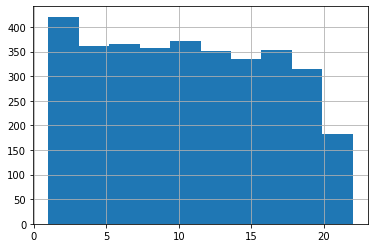

In [129]:
#Distribution of tenure
mergedDf['tenure'].hist()

In [130]:
#Check numerical variables info
mergedDf.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,frequency
count,3492.000000,3492.000000,3416.000000,3492.000000
mean,1750.335052,48.808706,10.684426,5.675258
std,1010.362109,28.600240,5.675970,2.311328
min,1.000000,0.000000,1.000000,1.000000
25%,876.750000,24.000000,6.000000,4.000000
50%,1750.500000,48.000000,11.000000,6.000000
75%,2624.250000,73.000000,15.000000,7.000000
max,3500.000000,99.000000,22.000000,14.000000


#### Looking at histogram and the results from describe() there are customers that are enrolled with the Company 1 year to 22 years. The tenure distributions is uniform-ish. 

In [131]:
#Replacing missing values of tenure with the its median value
mergedDf.tenure.fillna(mergedDf.tenure.median(), inplace=True)

In [132]:
#Give a score for tenure. 1 being the lowest and 4 the highest.
mergedDf['tenure_category'] = pd.qcut(mergedDf['tenure'],q=4,labels=[1,2,3,4])

#Check first rows
mergedDf.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,frequency,recency_category,tenure_category
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,5,11,1,2
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1,3,3,4
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,4,8,3,3
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,2,2,2
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,3,6,2,2


In [133]:
#Delete customers' last and first name
mergedDf.drop(['last_name','first_name'],axis=1,inplace=True)

#Check first rows
mergedDf.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,frequency,recency_category,tenure_category
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,5,11,1,2
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1,3,3,4
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,4,8,3,3
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,2,2,2
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,3,6,2,2


In [134]:
#Check total spent by customer in 2017
total_spent = Transactions.groupby(['customer_id','list_price']).sum().reset_index()
total_spent = total_spent.groupby('customer_id')[['list_price']].sum()

total_spent

,list_price
customer_id,
1,9084.45
2,4149.07
3,9888.23
4,1047.72
5,5903.20
...,...
3497,3744.07
3498,5177.06
3499,7673.48


In [135]:
#Create a column containing monetary (value) category based on total spent by customers
total_spent['monetary_category'] = pd.qcut(total_spent['list_price'],q=4,labels=[1,2,3,4])

In [136]:
#Add the monetary category column to mergedDf pairing by customer_id
mergedDf = mergedDf.merge(total_spent['monetary_category'], on='customer_id')

#Check first rows
mergedDf.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,frequency,recency_category,tenure_category,monetary_category
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,5,11,1,2,5
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1,3,3,4,2
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,4,8,3,3,5
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,2,2,2,1
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,3,6,2,2,3


### CustomerAddress spreadsheet

In [137]:
#Check the first rows of the sheet
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


#### The first thing that I noticed is that the state column's values are either abbreviation or written in full. I suggest to keep the abbreviation as in the NewCustomerList spreadsheet.
#### Is the 'property valuation' column the same meaning/info showed in the Rank column in the NewCustomerList spreadsheet? If so, suggest to keep just one term: 'rank' .
#### Just the 'new' customers have the property value stored as 'value' in the NewCustomerList?

In [138]:
# Replace property_valuation by rank
CustomerAddress.rename(columns = {"property_valuation": 'rank'}, inplace = False)

,customer_id,address,postcode,state,country,rank
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [139]:
#Unique values of state
CustomerAddress.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [140]:
#Replace state name by its abbreviation
CustomerAddress.state.replace({"New South Wales": "NSW", 'Victoria': 'VIC'}, inplace=True)

In [141]:
#Unique values of postcode
CustomerAddress.postcode.unique()

array([2016, 2153, 4211, 2448, 3216, 2210, 2650, 2023, 3044, 4557, 3799,
       2760, 2428, 3331, 3058, 2135, 2233, 2444, 4413, 4740, 3218, 4868,
       4116, 2519, 2756, 2170, 4005, 4127, 2535, 4726, 4805, 2212, 2207,
       3350, 3931, 4018, 4670, 2480, 3212, 2322, 3198, 2047, 4503, 2145,
       4350, 2142, 2029, 2127, 4280, 2166, 2046, 2026, 2765, 2749, 2745,
       3752, 2217, 2230, 3046, 3183, 2070, 2213, 4208, 2774, 4133, 4213,
       4170, 2073, 3561, 2330, 3977, 2204, 2086, 2226, 2075, 2038, 2069,
       2100, 3133, 3070, 2777, 2125, 2766, 2209, 2160, 2065, 2150, 2168,
       4171, 2155, 2517, 2096, 2750, 2093, 3204, 4300, 3844, 4226, 3192,
       2485, 2097, 4817, 2516, 3074, 4508, 4405, 2452, 2205, 4132, 4744,
       2158, 3201, 4178, 2112, 2033, 4401, 3186, 4017, 2315, 2285, 2219,
       4509, 2759, 2747, 2227, 2025, 3191, 3025, 2263, 2154, 2119, 3016,
       4113, 2032, 4352, 3020, 2116, 3057, 2099, 3749, 2148, 3145, 2021,
       2333, 2783, 2280, 4120, 3638, 2074, 2880, 24

In [142]:
#Check the variables info
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [143]:
#Check if the sheet does not contain duplicated customers by unique value of customer_id
len(list(CustomerAddress.customer_id.unique()))

3999

#### There are 3999 records of customers, but only 3996 unique values of customer_id. There might be duplicated values of customer_id.

In [144]:
#Double checking if there is no duplicated customers
duplicatedID = CustomerAddress[CustomerAddress.duplicated(subset=['customer_id'],keep=False)]
duplicatedID

,customer_id,address,postcode,state,country,property_valuation


In [145]:
#Check if there are missing values
mergedDf.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     76
job_title                              423
job_industry_category                  561
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
frequency_category                       0
frequency                                0
recency_category                         0
tenure_category                          0
monetary_category                        0
dtype: int64

In [146]:
#Check if all customers in CustomerAddress sheet are in CustomerDemographic sheet
CustomerAddress['customer_id'].isin(CustomerDemographic['customer_id']).value_counts()

True     3996
False       3
Name: customer_id, dtype: int64

#### Red flag: 3 customers in CustomerAddress are not in CustomerDemographic sheet.

In [147]:
#Check what customers from CustomerAddress sheet are not in CustomerDemographic sheet 
set(CustomerAddress['customer_id']).difference(set(CustomerDemographic['customer_id']))

{4001, 4002, 4003}

In [148]:
#Check if the customers with no demographic info made a transaction in 2017
justAddress = Transactions[Transactions['customer_id'].isin([4001,4002,4003])]
justAddress['transaction_id'].count()

0

#### Customer  that only has address information, but no demographic information hasn't made any transaction recently.

In [149]:
#Delete addresses of customers that are not in the CustomerDemographic table
CustomerAddress.drop(CustomerAddress[CustomerAddress['customer_id'] == 4001].index, inplace=True)
CustomerAddress.drop(CustomerAddress[CustomerAddress['customer_id'] == 4002].index, inplace=True)
CustomerAddress.drop(CustomerAddress[CustomerAddress['customer_id'] == 4003].index, inplace=True)

In [150]:
#Check if there are customers from CustomerDemographic sheet that are not in CustomerAddress sheet
set(CustomerDemographic['customer_id']).difference(set(CustomerAddress['customer_id']))

{3, 10, 22, 23}

#### 3 customers (with id number 4001, 4002, and 4003) in the CustomerAddress sheet have no info in the CustomerDemographic sheet
#### 4 customers (with id number 03, 10, 22, and 23) in the CustomerDemographic sheet have no info in the CustomerAddress sheet

In [151]:
#Check number of transaction made by customers with no address info
missingAddress = Transactions[Transactions['customer_id'].isin([3,10,22,23])]
missingAddress['transaction_id'].count()

28

In [152]:
#Total of list price of products purchased by customers with missing address info
missingAddress['list_price'].sum()

33448.5

#### 29 transactions made by customers with no address information. If the purchase was made online, it could be tracked.
#### Nearly 35000 dollars from products sold to customer with missing address information.

In [153]:
#Merge customer address sheet with mergedDf pairing by customer_id
mergedDf = pd.merge(
    mergedDf,
    CustomerAddress,
    how="outer",
    on='customer_id',
    suffixes=("_x", "_y"),
    copy=True,
    indicator='merge_indicator',
    validate=None,
)

#Check first rows
mergedDf.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,frequency,recency_category,tenure_category,monetary_category,address,postcode,state,country,property_valuation,merge_indicator
0,1,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,...,11.0,1,2,5,060 Morning Avenue,2016.0,NSW,Australia,10.0,both
1,2,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,...,3.0,3,4,2,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,both
2,3,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,...,8.0,3,3,5,NaN,NaN,NaN,NaN,NaN,left_only
3,4,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,...,2.0,2,2,1,0 Holy Cross Court,4211.0,QLD,Australia,9.0,both
4,5,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,...,6.0,2,2,3,17979 Del Mar Point,2448.0,NSW,Australia,4.0,both


In [154]:
#Check 'types' of merge completed
mergedDf.merge_indicator.unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['both', 'left_only', 'right_only']

#### There are customer with no address information(left only) and customers with no demographic information(right only). I was expecting just the left_only and both, but no right_only.

In [155]:
#Records with only address info (missing demographic info)
mergedDf.loc[mergedDf['merge_indicator'] == 'right_only']

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,frequency,recency_category,tenure_category,monetary_category,address,postcode,state,country,property_valuation,merge_indicator
3492,287,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5583 Prairie Rose Trail,2765.0,NSW,Australia,8.0,right_only
3493,852,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,641 Waywood Lane,2336.0,NSW,Australia,7.0,right_only
3494,869,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6712 Nova Crossing,2065.0,NSW,Australia,10.0,right_only
3495,1373,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,939 Hermina Drive,3198.0,VIC,Australia,8.0,right_only
3496,2074,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0442 Debra Point,2281.0,NSW,Australia,7.0,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0 Transport Center,3977.0,VIC,Australia,6.0,right_only
3996,3997,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4 Dovetail Crossing,2350.0,NSW,Australia,2.0,right_only
3997,3998,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,736 Roxbury Junction,2540.0,NSW,Australia,6.0,right_only
3998,3999,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1482 Hauk Trail,3064.0,VIC,Australia,3.0,right_only


In [156]:
#Records with missing address info
mergedDf.loc[mergedDf['merge_indicator'] == 'left_only']

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,frequency,recency_category,tenure_category,monetary_category,address,postcode,state,country,property_valuation,merge_indicator
2,3,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,...,8.0,3,3,5,NaN,NaN,NaN,NaN,NaN,left_only
9,10,Female,49.0,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,...,6.0,4,4,4,NaN,NaN,NaN,NaN,NaN,left_only
21,22,Female,79.0,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,...,7.0,1,2,4,NaN,NaN,NaN,NaN,NaN,left_only
22,23,Male,43.0,1995-02-10,NaN,NaN,High Net Worth,N,Yes,1.0,...,7.0,1,1,5,NaN,NaN,NaN,NaN,NaN,left_only


In [157]:
#Delete column address as it doesn't have important information.
mergedDf.drop('address',axis=1, inplace=True)

In [158]:
#Keep only customers who have don't have only address info
mergedDf = mergedDf[mergedDf.merge_indicator != 'right_only']

In [159]:
#Check if there is customer with just address info
mergedDf.loc[mergedDf['merge_indicator'] == 'right_only']

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,frequency,recency_category,tenure_category,monetary_category,postcode,state,country,property_valuation,merge_indicator


In [160]:
#Check first rows
mergedDf.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,frequency,recency_category,tenure_category,monetary_category,postcode,state,country,property_valuation,merge_indicator
0,1,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,5,11.0,1,2,5,2016.0,NSW,Australia,10.0,both
1,2,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1,3.0,3,4,2,2153.0,NSW,Australia,10.0,both
2,3,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,4,8.0,3,3,5,NaN,NaN,NaN,NaN,left_only
3,4,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,2.0,2,2,1,4211.0,QLD,Australia,9.0,both
4,5,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,3,6.0,2,2,3,2448.0,NSW,Australia,4.0,both


In [161]:
#Create age column 
mergedDf['age'] = dob.apply(age)

In [162]:
# Replace missing values of age by avg age
avg_age_merged=mergedDf['age'].mean()
mergedDf['age'].fillna(value=avg_age_merged, inplace=True)

#Check if there is any missing value of age
mergedDf['age'].isnull().sum()

0

In [163]:
#Create age group column
mergedDf['age_group'] = pd.cut(mergedDf.age,bins=[19,24,44,64,99],labels=['Young adult','Adult','Middle age','Older people'])

mergedDf.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,recency_category,tenure_category,monetary_category,postcode,state,country,property_valuation,merge_indicator,age,age_group
0,1,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,...,1,2,5,2016.0,NSW,Australia,10.0,both,64.0,Middle age
1,2,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,...,3,4,2,2153.0,NSW,Australia,10.0,both,51.0,Middle age
2,3,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,...,3,3,5,NaN,NaN,NaN,NaN,left_only,46.0,Middle age
3,4,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,...,2,2,1,4211.0,QLD,Australia,9.0,both,42.0,Adult
4,5,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,...,2,2,3,2448.0,NSW,Australia,4.0,both,55.0,Middle age


In [164]:
#Drop DOB as there is age column already
mergedDf.drop('DOB',axis=1, inplace=True)

In [165]:
#Standarlise values
mergedDf.owns_car.replace({'Yes': 'Y', 'No': 'N'}, inplace = True)

#Check first rows
mergedDf.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,...,recency_category,tenure_category,monetary_category,postcode,state,country,property_valuation,merge_indicator,age,age_group
0,1,Female,93.0,Executive Secretary,Health,Mass Customer,N,Y,11.0,5,...,1,2,5,2016.0,NSW,Australia,10.0,both,64.0,Middle age
1,2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,N,Y,16.0,1,...,3,4,2,2153.0,NSW,Australia,10.0,both,51.0,Middle age
2,3,Male,61.0,Recruiting Manager,Property,Mass Customer,N,Y,15.0,4,...,3,3,5,NaN,NaN,NaN,NaN,left_only,46.0,Middle age
3,4,Male,33.0,NaN,IT,Mass Customer,N,N,7.0,1,...,2,2,1,4211.0,QLD,Australia,9.0,both,42.0,Adult
4,5,Female,56.0,Senior Editor,NaN,Affluent Customer,N,Y,8.0,3,...,2,2,3,2448.0,NSW,Australia,4.0,both,55.0,Middle age


In [166]:
#Check missing values
mergedDf.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
job_title                              423
job_industry_category                  561
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
frequency_category                       0
frequency                                0
recency_category                         0
tenure_category                          0
monetary_category                        0
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
merge_indicator                          0
age                                      0
age_group                                6
dtype: int64

In [167]:
#Records with missing age group
missing_age_group = mergedDf[mergedDf.age_group.isnull()]
missing_age_group

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,...,recency_category,tenure_category,monetary_category,postcode,state,country,property_valuation,merge_indicator,age,age_group
354,356,Female,10.0,Librarian,Entertainment,High Net Worth,N,N,5.0,2,...,2,1,3,4055.0,QLD,Australia,3.0,both,19.0,NaN
396,398,Female,20.0,NaN,Retail,Affluent Customer,N,N,11.0,4,...,4,2,1,3191.0,VIC,Australia,12.0,both,19.0,NaN
475,477,Female,32.0,Media Manager II,Financial Services,High Net Worth,N,Y,13.0,2,...,4,3,3,2197.0,NSW,Australia,9.0,both,19.0,NaN
569,571,Female,30.0,Assistant Media Planner,Entertainment,Mass Customer,N,N,6.0,1,...,4,1,2,3121.0,VIC,Australia,10.0,both,19.0,NaN
763,765,Female,50.0,NaN,Retail,Affluent Customer,N,N,16.0,5,...,3,4,5,3630.0,VIC,Australia,1.0,both,19.0,NaN
996,1000,Female,44.0,Compensation Analyst,Financial Services,Mass Customer,N,N,11.0,5,...,1,2,5,3136.0,VIC,Australia,9.0,both,19.0,NaN


In [168]:
#Replace missing values of age_group with 'Young adult' as all customers with missing age_group value is 19 years old
mergedDf['age_group'].fillna(value='Young adult', inplace=True)

#Check if there is any customer with missing age_group value
missing_age_group = mergedDf[mergedDf.age_group.isnull()]
missing_age_group

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,...,recency_category,tenure_category,monetary_category,postcode,state,country,property_valuation,merge_indicator,age,age_group


In [169]:
#Check correlation between variables
mergedDf.corr(method='spearman')

,customer_id,past_3_years_bike_related_purchases,tenure,frequency,postcode,property_valuation,age
customer_id,1.000000,-0.011001,-0.018372,-0.032669,0.021061,-0.015373,0.021986
past_3_years_bike_related_purchases,-0.011001,1.000000,-0.010302,0.004799,-0.013891,0.011786,-0.014574
tenure,-0.018372,-0.010302,1.000000,-0.004246,0.000889,-0.015364,-0.021902
frequency,-0.032669,0.004799,-0.004246,1.000000,-0.007865,0.001457,-0.005864
postcode,0.021061,-0.013891,0.000889,-0.007865,1.000000,-0.577558,0.022241
property_valuation,-0.015373,0.011786,-0.015364,0.001457,-0.577558,1.000000,-0.002093
age,0.021986,-0.014574,-0.021902,-0.005864,0.022241,-0.002093,1.000000


#### There is only one (negative) correlation: postcode and property valuation.

In [170]:
#Check numerical variables
mergedDf.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3492.0,1750.335052,1010.362109,1.0,876.75000,1750.50000,2624.25000,3500.0
past_3_years_bike_related_purchases,3492.0,48.808706,28.600240,0.0,24.00000,48.00000,73.00000,99.0
tenure,3492.0,10.691294,5.614035,1.0,6.00000,11.00000,15.00000,22.0
frequency,3492.0,5.675258,2.311328,1.0,4.00000,6.00000,7.00000,14.0
postcode,3488.0,2989.401376,852.313191,2000.0,2200.00000,2768.00000,3757.00000,4883.0
property_valuation,3488.0,7.515768,2.822801,1.0,6.00000,8.00000,10.00000,12.0
age,3492.0,49.778230,9.051013,19.0,49.77823,49.77823,49.77823,83.0


In [171]:
#Create a score of number of purchases made in the last 3 years
mergedDf['frequency_category_3years'] = pd.qcut(mergedDf['past_3_years_bike_related_purchases'],q=4,labels=[1,2,3,4])

In [172]:
mergedDf.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,...,tenure_category,monetary_category,postcode,state,country,property_valuation,merge_indicator,age,age_group,frequency_category_3years
0,1,Female,93.0,Executive Secretary,Health,Mass Customer,N,Y,11.0,5,...,2,5,2016.0,NSW,Australia,10.0,both,64.0,Middle age,4
1,2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,N,Y,16.0,1,...,4,2,2153.0,NSW,Australia,10.0,both,51.0,Middle age,4
2,3,Male,61.0,Recruiting Manager,Property,Mass Customer,N,Y,15.0,4,...,3,5,NaN,NaN,NaN,NaN,left_only,46.0,Middle age,3
3,4,Male,33.0,NaN,IT,Mass Customer,N,N,7.0,1,...,2,1,4211.0,QLD,Australia,9.0,both,42.0,Adult,2
4,5,Female,56.0,Senior Editor,NaN,Affluent Customer,N,Y,8.0,3,...,2,3,2448.0,NSW,Australia,4.0,both,55.0,Middle age,3


In [173]:
#Who are the frequent buyers?
frequent_buyers = mergedDf.loc[((mergedDf['frequency_category_3years'] == 4) & (mergedDf['frequency_category'] == 4))]
frequent_buyers

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,...,tenure_category,monetary_category,postcode,state,country,property_valuation,merge_indicator,age,age_group,frequency_category_3years
17,18,Female,79.0,Professor,NaN,Affluent Customer,N,N,11.0,4,...,2,5,2135.0,NSW,Australia,12.0,both,45.00000,Middle age,4
21,22,Female,79.0,NaN,IT,Mass Customer,N,N,11.0,4,...,2,4,NaN,NaN,NaN,NaN,left_only,27.00000,Adult,4
83,84,Male,78.0,Accountant III,NaN,Mass Customer,N,Y,14.0,4,...,3,2,2086.0,NSW,Australia,11.0,both,45.00000,Middle age,4
89,90,Male,76.0,Quality Control Specialist,Manufacturing,Mass Customer,N,N,11.0,4,...,2,4,2233.0,NSW,Australia,10.0,both,49.00000,Middle age,4
114,115,Male,77.0,Account Executive,Health,Mass Customer,N,N,18.0,4,...,4,4,3844.0,VIC,Australia,1.0,both,43.00000,Adult,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,3409,Female,75.0,Desktop Support Technician,Agriculture,Mass Customer,N,N,16.0,4,...,4,3,4870.0,QLD,Australia,1.0,both,49.77823,Middle age,4
3408,3417,Female,91.0,Social Worker,Health,Mass Customer,N,N,7.0,4,...,2,5,3131.0,VIC,Australia,12.0,both,49.77823,Middle age,4
3421,3430,Male,77.0,Research Nurse,Health,Affluent Customer,N,Y,9.0,4,...,2,3,2060.0,NSW,Australia,12.0,both,49.77823,Middle age,4
3423,3432,Female,99.0,Junior Executive,Agriculture,Mass Customer,N,Y,2.0,4,...,1,5,4173.0,QLD,Australia,7.0,both,49.77823,Middle age,4


In [174]:
#Frequent buyers numerical variables info
frequent_buyers.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,191.0,1759.931937,994.598385,18.0,914.50000,1725.00000,2577.00000,3477.0
past_3_years_bike_related_purchases,191.0,86.235602,7.949974,74.0,80.00000,84.00000,94.00000,99.0
tenure,191.0,9.968586,5.382140,1.0,6.00000,10.00000,14.50000,22.0
frequency,191.0,7.418848,0.494667,7.0,7.00000,7.00000,8.00000,8.0
postcode,190.0,2999.826316,903.392809,2010.0,2173.00000,2758.00000,3832.00000,4883.0
property_valuation,190.0,7.368421,2.913398,1.0,5.00000,8.00000,9.75000,12.0
age,191.0,49.945641,8.612773,21.0,49.77823,49.77823,49.77823,82.0


#### The frequent buyers:
- Are 50 years old
- Are customers for 10 years
- Purchased 87 times  in the last 3 years

### Who are Sprocket Central Pty's customers?

https://github.com/Arkadeep2510/KPMG-Virtual-Internship-Files/blob/main/KPMG%20Task%202.ipynb

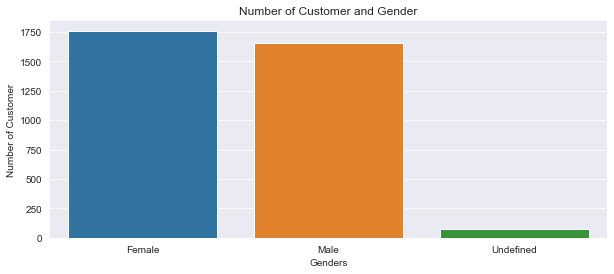

In [175]:
#Gender
genders = mergedDf.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title("Number of Customer and Gender")
plt.xlabel("Genders")
plt.ylabel("Number of Customer")
plt.show()

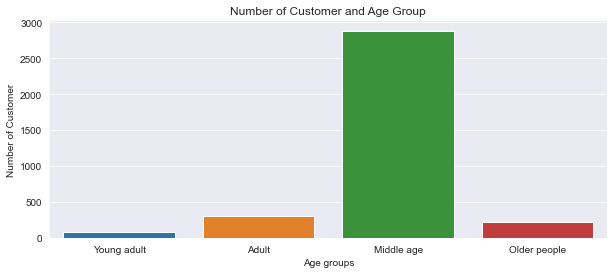

In [176]:
#Age group
age_groups = mergedDf.age_group.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=age_groups.index, y=age_groups.values)
plt.title("Number of Customer and Age Group")
plt.xlabel("Age groups")
plt.ylabel("Number of Customer")
plt.show()

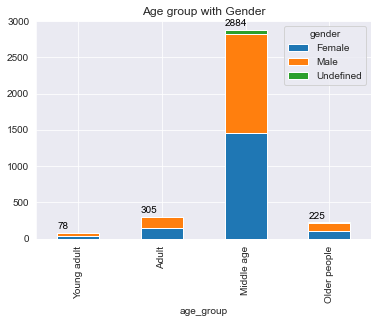

In [177]:
# Gender by Age group
mergedDf.groupby('age_group')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('age_group') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 3000])
plt.title('Age group with Gender')
plt.show()

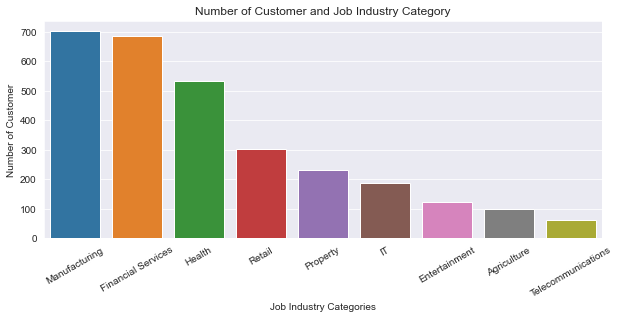

In [178]:
#Job industry
job_industry = mergedDf.job_industry_category.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=job_industry.index, y=job_industry.values)
plt.title("Number of Customer and Job Industry Category")
plt.xticks(rotation=30)
plt.xlabel("Job Industry Categories")
plt.ylabel("Number of Customer")
plt.show()

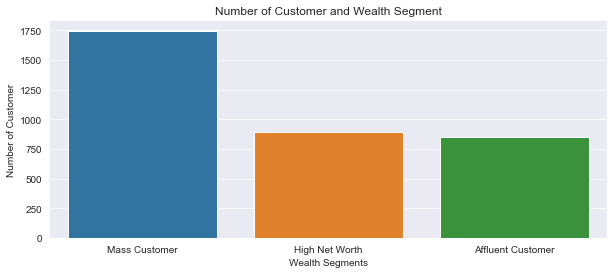

In [179]:
#Wealth segment
wealth_segments = mergedDf.wealth_segment.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=wealth_segments.index, y=wealth_segments.values)
plt.title("Number of Customer and Wealth Segment")
plt.xlabel("Wealth Segments")
plt.ylabel("Number of Customer")
plt.show()

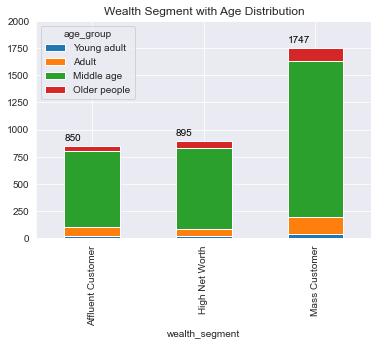

In [180]:
#Wealth segment by age group
mergedDf.groupby('wealth_segment')['age_group'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('wealth_segment') \
                      .agg({'age_group': lambda x: len(x)})['age_group']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

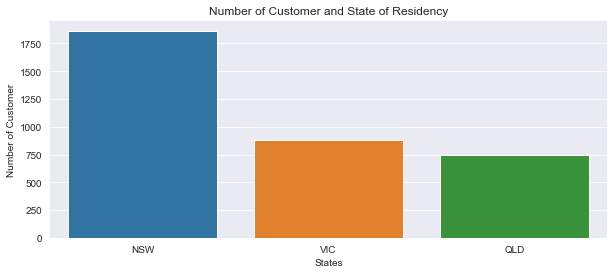

In [181]:
#State of residency
states = mergedDf.state.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=states.index, y=states.values)
plt.title("Number of Customer and State of Residency")
plt.xlabel("States")
plt.ylabel("Number of Customer")
plt.show()

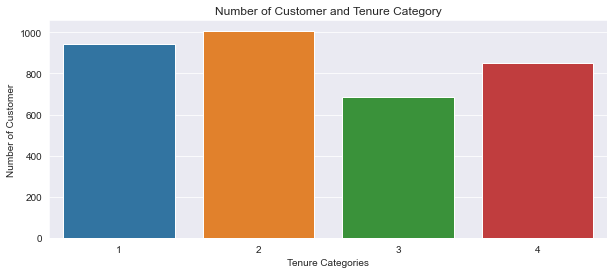

In [182]:
#Tenure category
tenure_cat = mergedDf.tenure_category.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=tenure_cat.index, y=tenure_cat.values)
plt.title("Number of Customer and Tenure Category")
plt.xlabel("Tenure Categories")
plt.ylabel("Number of Customer")
plt.show()

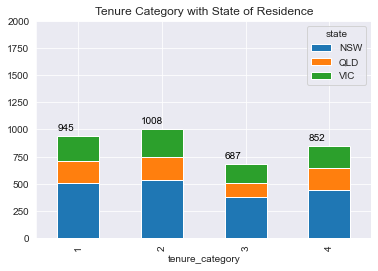

In [183]:
# Tenure category by state
mergedDf.groupby('tenure_category')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('tenure_category') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Tenure Category with State of Residence')
plt.show()

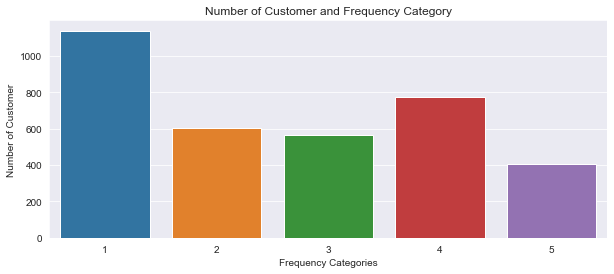

In [184]:
#Frequency category (in 2017)
frequency = mergedDf.frequency_category.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title("Number of Customer and Frequency Category")
plt.xlabel("Frequency Categories")
plt.ylabel("Number of Customer")
plt.show()

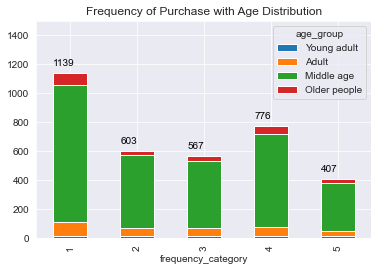

In [185]:
# Frequency of purchase by age group

mergedDf.groupby('frequency_category')['age_group'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('frequency_category') \
                      .agg({'age_group': lambda x: len(x)})['age_group']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1500])
plt.title('Frequency of Purchase with Age Distribution')
plt.show()

#### Interesting to note that most of the customers are middle age. However, looking at the frequency of purchase with age distribution it is clear that older people customers are the ones who buy more often.

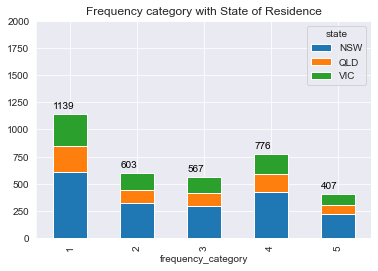

In [186]:
# Frequency of purchase by state of residence

mergedDf.groupby('frequency_category')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('frequency_category') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Frequency category with State of Residence')
plt.show()

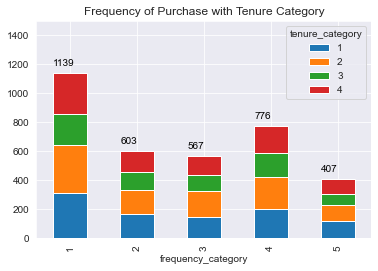

In [187]:
# Frequency of purchase by tenure category
mergedDf.groupby('frequency_category')['tenure_category'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('frequency_category') \
                      .agg({'tenure_category': lambda x: len(x)})['tenure_category']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1500])
plt.title('Frequency of Purchase with Tenure Category')
plt.show()

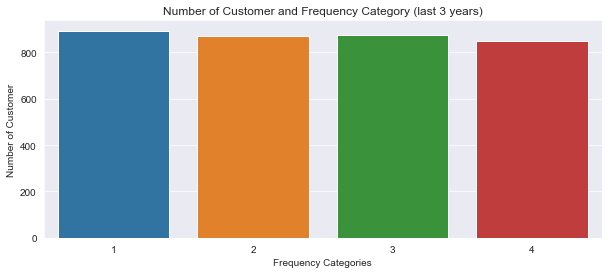

In [188]:
#Frequency category (last 3 years)
frequency_3years = mergedDf.frequency_category_3years.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=frequency_3years.index, y=frequency_3years.values)
plt.title("Number of Customer and Frequency Category (last 3 years)")
plt.xlabel("Frequency Categories")
plt.ylabel("Number of Customer")
plt.show()

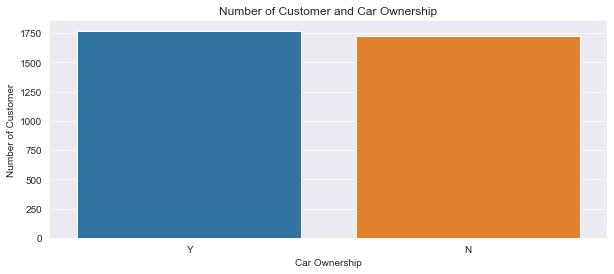

In [189]:
#Car ownership
cars = mergedDf.owns_car.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=cars.index, y=cars.values)
plt.title("Number of Customer and Car Ownership")
plt.xlabel("Car Ownership")
plt.ylabel("Number of Customer")
plt.show()

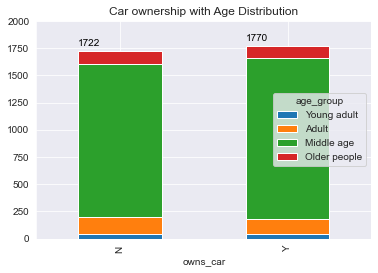

In [190]:
#Car ownership by age group

mergedDf.groupby('owns_car')['age_group'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('owns_car') \
                      .agg({'age_group': lambda x: len(x)})['age_group']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Car ownership with Age Distribution')
plt.show()

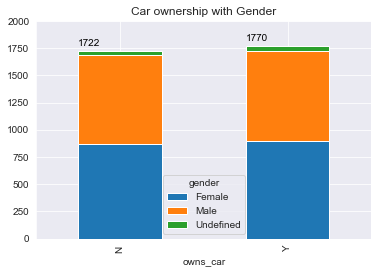

In [191]:
#Car ownership by gender

mergedDf.groupby('owns_car')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('owns_car') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Car ownership with Gender')
plt.show()

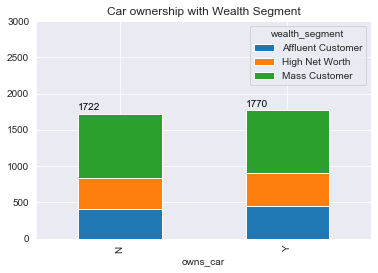

In [192]:
#Car ownership by wealth segment

mergedDf.groupby('owns_car')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('owns_car') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 3000])
plt.title('Car ownership with Wealth Segment')
plt.show()

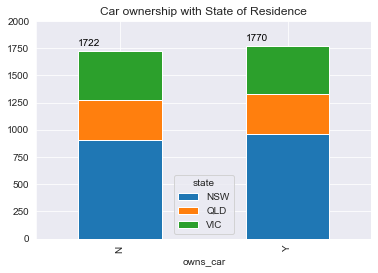

In [193]:
#Car ownership by state of residence

mergedDf.groupby('owns_car')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('owns_car') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Car ownership with State of Residence')
plt.show()

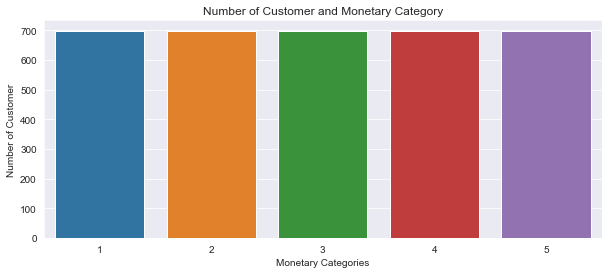

In [194]:
#Monetary category

monetary = mergedDf.monetary_category.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=monetary.index, y=monetary.values)
plt.title("Number of Customer and Monetary Category")
plt.xlabel("Monetary Categories")
plt.ylabel("Number of Customer")
plt.show()

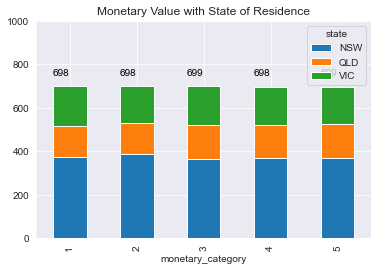

In [195]:
#Monetary category by state of residence

mergedDf.groupby('monetary_category')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(mergedDf.groupby('monetary_category') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Monetary Value with State of Residence')
plt.show()

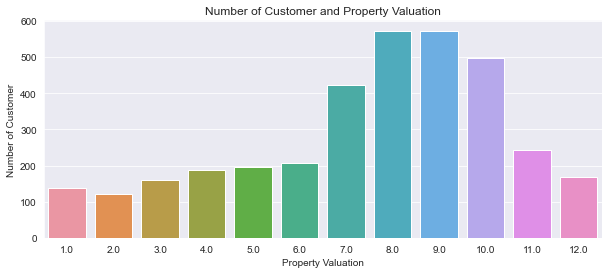

In [196]:
#Property valuation
property = mergedDf.property_valuation.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=property.index, y=property.values)
plt.title("Number of Customer and Property Valuation")
plt.xlabel("Property Valuation")
plt.ylabel("Number of Customer")
plt.show()

### Customer segmentation

In [197]:
mergedDf.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,frequency_category,...,tenure_category,monetary_category,postcode,state,country,property_valuation,merge_indicator,age,age_group,frequency_category_3years
0,1,Female,93.0,Executive Secretary,Health,Mass Customer,N,Y,11.0,5,...,2,5,2016.0,NSW,Australia,10.0,both,64.0,Middle age,4
1,2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,N,Y,16.0,1,...,4,2,2153.0,NSW,Australia,10.0,both,51.0,Middle age,4
2,3,Male,61.0,Recruiting Manager,Property,Mass Customer,N,Y,15.0,4,...,3,5,NaN,NaN,NaN,NaN,left_only,46.0,Middle age,3
3,4,Male,33.0,NaN,IT,Mass Customer,N,N,7.0,1,...,2,1,4211.0,QLD,Australia,9.0,both,42.0,Adult,2
4,5,Female,56.0,Senior Editor,NaN,Affluent Customer,N,Y,8.0,3,...,2,3,2448.0,NSW,Australia,4.0,both,55.0,Middle age,3


### Transform data before KMeans

In [198]:
#Create a copy of mergedDf that will be used to KMeans
df = mergedDf.copy()

In [199]:
#Replace string by integers: gender,job_industry_category,owns_car,state,wealth_segment

df["gender"].replace({'Female': 1, 'Male':2,'Undefined':3}, inplace=True)

In [200]:
df["job_industry_category"].replace({'Health':1, 'Financial Services':2, 'Property':3, 'IT':4, 'Retail':5,
       'Agriculture':6, 'Manufacturing':7, 'Telecommunications':8,
       'Entertainment':9}, inplace=True)

In [201]:
df["owns_car"].replace({'N':0, 'Y':1}, inplace=True)

In [202]:
df["state"].replace({'NSW':1, 'QLD':2, 'VIC':3}, inplace=True)

In [203]:
df["wealth_segment"].replace({'Affluent Customer':1, 'High Net Worth':2, 'Mass Customer':3}, inplace=True)

In [204]:
df.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'frequency_category',
       'frequency', 'recency_category', 'tenure_category', 'monetary_category',
       'postcode', 'state', 'country', 'property_valuation', 'merge_indicator',
       'age', 'age_group', 'frequency_category_3years'],
      dtype='object')

In [205]:
NewCustomerList.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'rank', 'value', 'age', 'age_group', 'year'],
      dtype='object')

In [206]:
#Drop columns that:
# do not exist in NewCustomerList sheet
# are not 'important' for customer segmentation
df.drop(columns=['gender','tenure_category','age','job_industry_category','frequency_category_3years','wealth_segment','owns_car','property_valuation','country','past_3_years_bike_related_purchases','state','postcode','merge_indicator','job_title','age_group','deceased_indicator'], axis=1,inplace=True) 

In [207]:
#Check missing values
#df.job_industry_category.isnull().value_counts()

In [208]:
#df.state.isnull().value_counts()

In [209]:
#Create a random permuation of the categorical values
#permutation = np.random.permutation(df['job_industry_category'])
#permuta = np.random.permutation(df['state'])

#erase the empty values
#empty_is = np.where(permutation == "")
#empty_v = np.where(permuta == "")

#permutation = np.delete(permutation, empty_is)
#permuta = np.delete(permuta, empty_v)

#replace all empty values of the dataframe[field]
#end = len(permutation)
#end_v = len(permuta)


#df['job_industry_category'] = df['job_industry_category'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)
#df['state'] = df['state'].apply(lambda x: permuta[np.random.randint(end_v)] if pd.isnull(x) else x)

In [210]:
#df.job_industry_category.isnull().value_counts()

In [211]:
#df.state.isnull().value_counts()

In [212]:
#df.isnull().sum()

In [213]:
#property = df[df['property_valuation'].isnull()]
#property

In [214]:
#property_state2 = df[df['state'].isin([2])]
#property_state2

In [215]:
#property_state3 = df[df['state'].isin([3])]
#property_state3

In [216]:
#Input the missing values of property valuation by its median grouped by state and wealth segment
#df['property_valuation'] = df.groupby('state')['wealth_segment'].transform(lambda x: x.fillna(x.median()))

#df.head()

In [217]:
#Check variables info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 3491
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         3492 non-null   int64   
 1   tenure              3492 non-null   float64 
 2   frequency_category  3492 non-null   category
 3   frequency           3492 non-null   float64 
 4   recency_category    3492 non-null   category
 5   monetary_category   3492 non-null   category
dtypes: category(3), float64(2), int64(1)
memory usage: 119.9 KB


In [218]:
#Convert the categorical pd object to Integer type
df['frequency_category'] = df['frequency_category'].astype('int64')
df['recency_category'] = df['recency_category'].astype('int64')
df['monetary_category'] = df['monetary_category'].astype('int64')

<AxesSubplot:>

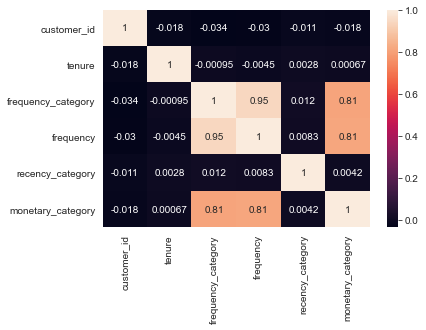

In [219]:
import seaborn as sns

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

#### There is only one strong positive correlation found: Monetary category vs Frequency category.

In [220]:
#df.drop(['job_industry_category', 'state','gender','owns_car','property_valuation','age','wealth_segment'], axis='columns', inplace=True)

In [221]:
#There are 75 missing records of job industry category (it represents 2.1% of the data). Drop the rows containing missing values.
df.dropna(inplace=True)

In [222]:
#Convert float to integer
df.astype(int)

,customer_id,tenure,frequency_category,frequency,recency_category,monetary_category
0,1,11,5,11,1,5
1,2,16,1,3,3,2
2,3,15,4,8,3,5
3,4,7,1,2,2,1
4,5,8,3,6,2,3
...,...,...,...,...,...,...
3487,3496,19,1,4,1,2
3488,3497,18,1,3,3,2
3489,3498,5,3,6,1,3
3490,3499,7,4,7,4,4


In [223]:
#Deal with outliers

from scipy import stats

z = np.abs(stats.zscore(df))

df = df[(z < 3).all(axis=1)]

df

,customer_id,tenure,frequency_category,frequency,recency_category,monetary_category
0,1,11.0,5,11.0,1,5
1,2,16.0,1,3.0,3,2
2,3,15.0,4,8.0,3,5
3,4,7.0,1,2.0,2,1
4,5,8.0,3,6.0,2,3
...,...,...,...,...,...,...
3487,3496,19.0,1,4.0,1,2
3488,3497,18.0,1,3.0,3,2
3489,3498,5.0,3,6.0,1,3
3490,3499,7.0,4,7.0,4,4


In [224]:
#Create RFM and RFM score columns
df['rfm'] = 100 * df['recency_category'] + 10 * df['frequency_category'] + df['monetary_category']
df['rfm_score'] = df['recency_category'] + df['frequency_category'] + df['monetary_category']

In [225]:
df.min()

customer_id             1.0
tenure                  1.0
frequency_category      1.0
frequency               1.0
recency_category        1.0
monetary_category       1.0
rfm                   111.0
rfm_score               3.0
dtype: float64

#### So, no customer signed up less than one year. 
#### The lowest rfm is 111, and rfm_score is 3

Top customers 
R = 4    F >= 3  M >=3

Active customers
R = 4   F =2   M 3-4
R = 4   F 2-4   M 1-2

Emerging customers
R = 3  F >=2   M >= 3

Unsteady customers
R =4  F = 1   M 1 - 4
R = 3 F = 1   M 3-4
R = 3 F 1-4   M 1-2

At risk customers
R = 2  F 1-4   M >=3
R = 1  F >=3   M 1-4

Potential lost customers
R = 2  F 1-2   M 1-2

Inactive customers
R = 1  F >=3   M >= 3

Lost customers
R = 1  F 1-2   M 1-2

<img src="https://i.ibb.co/hyLzdSJ/Blog-Customer-Segmentation-V2-en-2.png" alt="Blog-Customer-Segmentation-V2-en-2" border="0">

https://www.nextlytics.com/blog/machine-learning-in-customer-segmentation-with-rfm-analysis

***

## Task 1. Draft email to client
### Identify the data quality issues and strategies to mitigate these issues

Dear [client name]

Thank you for providing us with the three spreadsheets from Sprocket Central Pty Ltd. I'm from KPMG Data Analytics team and I have analysed the data provided. 

Based on the analysis done, I've grouped the data quality issues in three main groups listed below:

A. Missing information<br>
B. Not standardised structured data<br>
C. (Not) relevant information <br>


<b>A. Missing information</b>

<i>Transactions spreadsheet:</i>
- 555 transactions with at least one missing information.
- 358 transactions with no information if the order was made online
- 197 transactions with missing information about the product purchase: brand, line, class, size, standard cost and date that it was first sold.
- I believe that the company should be worried about missing informations related to product in the Transactions sheet. Those informations are quite important to understand the customer preferences, the revenue, and the product's stock control. Those informations should be tracked (maybe checking the invoices) and transferred into the Transactions sheet. 
- Besides that, I recommend to think in ways to avoid this kind of situation (missing important information). For example, is the data entered manually into this sheet? If so, we could automate this process. 

<i>CustomerDemographic spreadsheet:</i>
- 125 customers with missing last name
- 87 customers with no DOB information
- 506 customers with missing job title
- 87 customers with no tenure value

<i>NewCustomerList spreadsheet:</i>
- 152 (15%) of the spreadsheet with at least one missing data: 29 new customers have missing information about their last name, 17 new customers with no DOB, and 106 new customers with missing job title. I consider DOB and last name important data. Age can be correlated with customer behaviour and could be a feature to 'build' a machine learning algorithm to predict if the customer is going to accept or not a offer, for example. And last name can be one of the informations used to avoid duplicated record (e.g.it could be used along DOB).

<b>B. Not standardised structured data</b>

<i>Transactions spreadsheet:</i>
- I noticed that the 'list_price' columns has no currency sign. but the standard_cost contains a dollar sign before the amount. The amounts in the sheet should be consistent, so all the monetary data should be free of currency sign (and a metadata file should be created indicating detailed information, such as currency).


<i>NewCustomerList spreadsheet:</i>
- 1000 records of new customers with no customer_id. I suggest to assign to each of them a customer_id as many of them purchase frequently. Besides that, it is important to have information about transactions made to understand their behaviour. With no customer_id is not possible to check the transactions made. For example, there a customer who purchased 94 times, I cannot check what items s/he purchased.
- There are 3 genders: Male, Female and U. Not clear if U is for Unkown or Undefined. As gender in the sheet was not entered by code, it should be standarlised: or codes (F,M,U) or written(Female, Male, Unknown/Undefined).
- Keep an standarlised name for column. Usually they are all in lowercase. So, I suggest that the columns 'Rank' and 'Value' are written in lowercase (not capitalised).
- Agriculture in job industry column is mispelled (Argiculture). 


<i> CustomerAddress spreadsheet:</i>
- 29 transactions made by customers with no address information. If the purchase was made online, it could be tracked.
- Nearly 35000 dollar from products sold to customer with missing address information.
- 3 customers (with id number 4001, 4002, and 4003) in the CustomerAddress sheet have no info in the CustomerDemographic sheet
- 4 customers (with id number 03, 10, 22, and 23) in the CustomerDemographic sheet have no info in the CustomerAddress sheet

<i>All spreadsheets - Dates: </i>
- The date format of tramsaction_date in Transactions sheet is DD/MM/YYYY
- DOB in NewCustomerList sheet and in CustomerDemographic is YYYY-MM-DD
I suggest to follow the local Date format, such as the date and time Style manual from Australian Government (https://www.stylemanual.gov.au/style-rules-and-conventions/names-and-terms/dates-and-time). Therefore, dates should be DD/MM/YYY (numbers separated in a numeric date with an unspaced slash).

<b>C. (Not) relevant information</b>

<i>NewCustomerList spreadsheet:</i>
- I suggest to create a column containing the tenure of customers. That way, you can easily know if the customer is a 'new' one or not. By doing that you don't need to keep a separated spreadsheet only for new customers.


Feel free to reach me anytime if you have any query. Besides that, I would be available to spend some time with your data SME to ensure that all assumptions are aligned with your company's understanding.

Kind Regards,

Noa Prada Schnor<br>
Data Analyst<br>
KPMG